In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
train_dir = r'C:\Users\Sanika\Desktop\Untitled Folder\practice-final\cifar10\cifar10\train'
test_dir = r'C:\Users\Sanika\Desktop\Untitled Folder\practice-final\cifar10\cifar10\test'

In [47]:
train_datagen= ImageDataGenerator(rescale=(1.0/255))
test_datagen= ImageDataGenerator(rescale=(1.0/255))
train_size=2000
test_size= 1000

In [48]:
train_data_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=train_size,
    class_mode='categorical',
    shuffle=True,
)

test_data_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=test_size,
    class_mode='categorical',
    shuffle=True,
)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [49]:
x_train,y_train=train_data_generator[0]
x_test,y_test=test_data_generator[0]

In [50]:
x_train.shape

(2000, 32, 32, 3)

In [54]:
model = Sequential([
    Conv2D(32,(3,3),input_shape=(32, 32, 3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    
    Dense(512,activation='relu'),
    Dropout(0.2),
    
    Dense(10,activation='softmax'),
])

In [55]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624,586 (2.38 MB)

 Trainable params: 624,138 (2.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [63]:
history= model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7370 - loss: 0.8213 - val_accuracy: 0.4350 - val_loss: 1.6034
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7402 - loss: 0.7832 - val_accuracy: 0.4160 - val_loss: 1.6984
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7624 - loss: 0.6918 - val_accuracy: 0.4500 - val_loss: 1.7386
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8144 - loss: 0.6001 - val_accuracy: 0.3840 - val_loss: 1.9174
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8447 - loss: 0.5067 - val_accuracy: 0.4270 - val_loss: 1.8171
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8775 - loss: 0.4247 - val_accuracy: 0.4650 - val_loss: 1.6346
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8848 - loss: 0.3784 - val_accuracy: 0.3980 - val_loss: 1.8958
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9066 - loss: 0.3149 - val_accuracy: 0.3910 - v

In [64]:
test_loss,test_acc= model.evaluate(x_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5001 - loss: 2.0301


In [65]:
predictions= model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


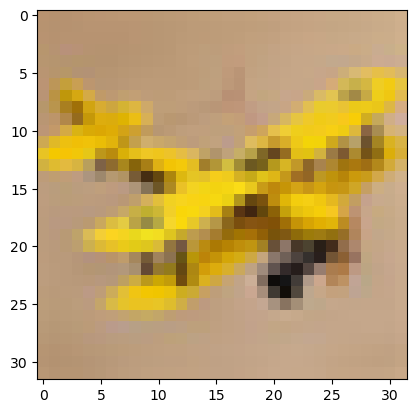

airplane


In [70]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
predicted_value=model.predict(x_test)
plt.imshow(x_test[1])
plt.show()
print(class_names[np.argmax(predicted_value[1], axis=0)])

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624,586 (2.38 MB)

 Trainable params: 624,138 (2.38 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1714 - loss: 2.4323 - val_accuracy: 0.1030 - val_loss: 2.2952
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3206 - loss: 1.8673 - val_accuracy: 0.0970 - val_loss: 2.3591
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4098 - loss: 1.6274 - val_accuracy: 0.1070 - val_loss: 2.3945
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4841 - loss: 1.4247 - val_accuracy: 0.1500 - val_loss: 2.3633
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5413 - loss: 1.3323 - val_accuracy: 0.1720 - val_loss: 2.3870
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5395 - loss: 1.3036 - val_accuracy: 0.2570 - val_loss: 2.0730
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6287 - loss: 1.1159 - val_accuracy: 0.3560 - val_loss: 1.7571
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6367 - loss: 1.0384 - val_accuracy: 0.3630 - v

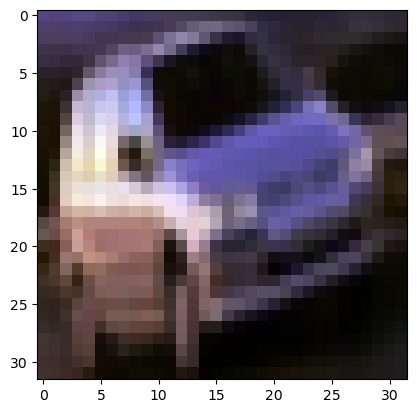

automobile


In [71]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r'C:\Users\Sanika\Desktop\Untitled Folder\practice-final\cifar10\cifar10\train'
test_dir = r'C:\Users\Sanika\Desktop\Untitled Folder\practice-final\cifar10\cifar10\test'

train_datagen= ImageDataGenerator(rescale=(1.0/255))
test_datagen= ImageDataGenerator(rescale=(1.0/255))
train_size=2000
test_size= 1000

train_data_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=train_size,
    class_mode='categorical',
    shuffle=True,
)

test_data_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=test_size,
    class_mode='categorical',
    shuffle=True,
)

x_train,y_train=train_data_generator[0]
x_test,y_test=test_data_generator[0]

x_train.shape

model = Sequential([
    Conv2D(32,(3,3),input_shape=(32, 32, 3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    
    Dense(512,activation='relu'),
    Dropout(0.2),
    
    Dense(10,activation='softmax'),
])

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

history= model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

test_loss,test_acc= model.evaluate(x_test,y_test)

predictions= model.predict(x_test)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
predicted_value=model.predict(x_test)
plt.imshow(x_test[1])
plt.show()
print(class_names[np.argmax(predicted_value[1], axis=0)])
